In [1]:
def get_data_by_title_id(title_id, access_token):

    headers = {
        'Content-Type':'application/json',
        'Authorization': access_token,
        'x-api-key': api_key,
        # 'Accept':'application/vnd.mrc-data.chart.v1.1+json'
    }

    url = f"https://api.musicconnect.mrc-data.com/api/song/{title_id}/data"

    # Create a session to reuse the same HTTP connection
    with requests.Session() as session:
        # Make the request
        r = session.post(url=url, headers=headers)

        # Access the metrics field directly
        metrics = r.json()['metrics']

        # Create a list of dictionaries to hold the data
        data = []
        for metric in metrics:
            top_level = metric['name'].lower()
            for value in metric['value']:
                data.append({
                    'title_id': title_id,
                    'top_level': top_level,
                    'period': value['name'],
                    'value': value['value']
                })

        # Create a DataFrame from the list of dictionaries
        df_row = pd.DataFrame(data).pivot_table(index='title_id', columns=['top_level', 'period'], values='value', aggfunc='first')

        # Sleep for one second to avoid hitting rate limits
        time.sleep(1)

        return df_row

SyntaxError: incomplete input (4193616224.py, line 1)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize, BoundaryNorm
from matplotlib.patches import Patch

# creating the data
data = [
    ['Fruit', [
        ['Apple', 50],
        ['Orange', 20]
    ]],
    ['Vegetable', [
        ['Tomato', 30],
        ['Carrot', 10]
    ]]
]

# creating the figure and axis
fig, ax = plt.subplots()

# calculating the sizes of the wedges
sizes = []
labels = []
color_map = cm.get_cmap('RdYlGn')
norm = Normalize()

def traverse_data(data, parent=''):
    for d in data:
        labels.append(parent + '/' + d[0])
        sizes.append(d[1])
        if len(d) == 3:
            traverse_data(d[2], parent=parent + '/' + d[0])

traverse_data(data)

# converting the sizes to floating-point values
sizes = [float(x) for x in sizes


SyntaxError: incomplete input (4222596881.py, line 37)

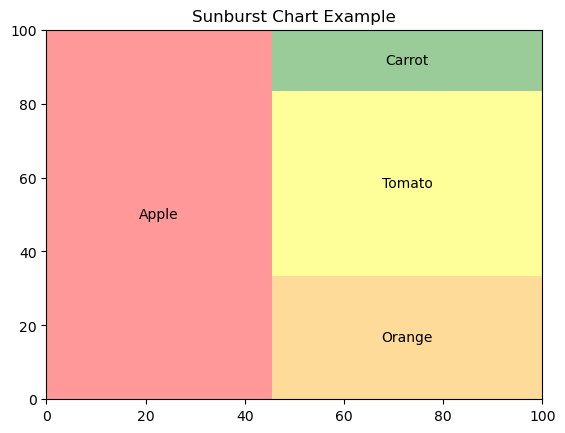

In [4]:
import matplotlib.pyplot as plt
import squarify

# creating the data
data = [
    ['Apple', 'Fruit', 50],
    ['Orange', 'Fruit', 20],
    ['Tomato', 'Vegetable', 30],
    ['Carrot', 'Vegetable', 10]
]

# creating the figure and axis
fig, ax = plt.subplots()

# plotting the sunburst chart
squarify.plot(sizes=[x[2] for x in data], label=[x[0] for x in data],
              color=["red", "orange", "yellow", "green"], alpha=.4)

# adding a title
ax.set_title('Sunburst Chart Example')

# showing the plot
plt.show()